In [4]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten

data_train_path='Downloads/ML/level0/plant/Train'
data_test_path='Downloads/ML/level0/plant/Test'
data_val_path='Downloads/ML/level0/plant/Validation'

img_width=180
img_height=180

data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

data_cat=data_train.class_names
plt.figure(figsize=(5,5))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [6]:
model=Sequential([
    layers.Rescaling(1/255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat),activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics='Accuracy')

In [7]:
epoch_size=2
history=model.fit(data_train,validation_data=data_val,epochs=epoch_size)

Epoch 1/2


C:\Users\MASANAMUTHU\anaconda3\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(




300/300 [==============================] - 297s 975ms/step - loss: 1.5687 - Accuracy: 0.4568 - val_loss: 1.2318 - val_Accuracy: 0.5602
Epoch 2/2
300/300 [==============================] - 440s 1s/step - loss: 1.0410 - Accuracy: 0.6421 - val_loss: 0.9739 - val_Accuracy: 0.6766


Text(0.5, 1.0, 'loss')

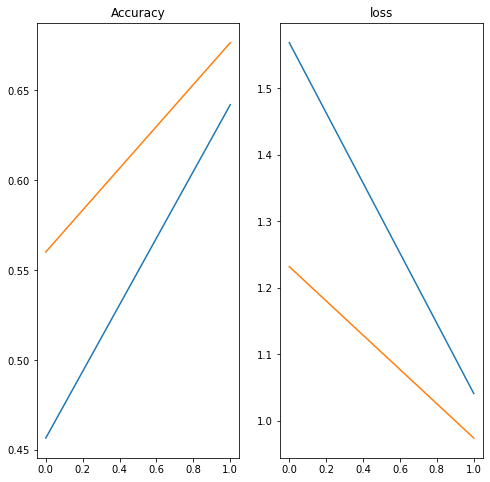

In [8]:
epochs_range=range(epoch_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['Accuracy'],label='Traning Accuracy')
plt.plot(epochs_range,history.history['val_Accuracy'],label='validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Traning loss')
plt.plot(epochs_range,history.history['val_loss'],label='validation =loss')
plt.title('loss')

In [16]:
image='Downloads/ML/level0/plant/guava.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [17]:
predict=model.predict(img_bat)
score=tf.nn.softmax(predict)

1/1 [==============================] - 0s 110ms/step


In [18]:
print(('veg/fruit in the image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100)))

veg/fruit in the image is guava with accuracy of 18.67
